# Moment Anomaly Detection Example

## Loading Moment Model

In [1]:
import os
import sys

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import MomentModel
from samay.dataset import MomentDataset
from samay.utils import load_args

repo = "AutonLab/MOMENT-1-large"
config = {
    "task_name": "reconstruction",
}
mmt = MomentModel(config=config, repo=repo)

/nethome/hkamarthi3/scratch/Samay/.venv/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
INFO:p-2050141:t-140043359618880:moment.py:_validate_inputs:Setting d_model to 1024


Loading MOMENT model from AutonLab/MOMENT-1-large


INFO:p-2050141:t-140043359618880:moment.py:_get_transformer_backbone:Initializing pre-trained transformer from google/flan-t5-large.
INFO:p-2050141:t-140043359618880:moment.py:_get_transformer_backbone:Enabling gradient checkpointing.


## Zero-Shot Anomaly Detection Using Moment Model

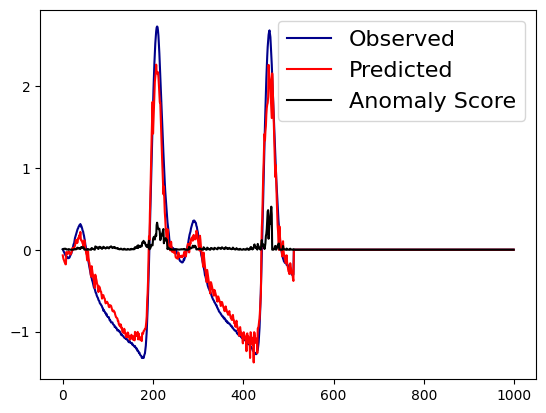

In [2]:
train_dataset = MomentDataset(
    name="ett",
    path="../data/data/198_UCR_Anomaly_tiltAPB2_50000_124159_124985.out",
    mode="train",
    boundaries=[50000, 50000, 0],
    task_name="detection",
    stride=512,
)
test_dataset = MomentDataset(
    name="ett",
    path="../data/data/198_UCR_Anomaly_tiltAPB2_50000_124159_124985.out",
    mode="test",
    boundaries=[50000, 50000, 0],
    task_name="detection",
    stride=512,
)
# print(len(train_dataset))
# print(len(test_dataset))
# trues, preds, labels = mmt.evaluate(test_dataset, task_name='detection')
mmt.plot(
    test_dataset,
    task_name="detection",
)